# Analiza klientów w podejściu hierarchicznym

# Zad. 

Proszę wziąć zbiór klientów win i dokonać podobnej analizy jak w k-means

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [45]:
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

Pobieramy dane z pliku "./WineKMC.xlsx". Co się w nich znajduje?

In [46]:
import pandas as pd

df_offers = pd.read_excel("WineKMC.xlsx", sheetname=0)
df_offers.columns = ["offer_id", "campaign", "varietal", "min_qty", "discount", "origin", "past_peak"]
df_offers.head()

,offer_id,campaign,varietal,min_qty,discount,origin,past_peak
0,1,January,Malbec,72,56,France,False
1,2,January,Pinot Noir,72,17,France,False
2,3,February,Espumante,144,32,Oregon,True
3,4,February,Champagne,72,48,France,True
4,5,February,Cabernet Sauvignon,144,44,New Zealand,True


i dane o ilości transakcji poszczegulnych osób

In [47]:
df_transactions = pd.read_excel("datasets/WineKMC.xlsx", sheetname=1)
df_transactions.columns = ["customer_name", "offer_id"]
df_transactions['n'] = 1
df_transactions.head()

,customer_name,offer_id,n
0,Smith,2,1
1,Smith,24,1
2,Johnson,17,1
3,Johnson,24,1
4,Johnson,26,1


# Zad

Stwórzmy tabelę, gdzie 

  * w wierszach są klienci a w kolumnach oferty 
  * dla każdego klienta zaznaczmy czy wybrał daną ofertę (1) czy nie (0).

In [48]:
# join the offers and transactions table
df = pd.merge(df_offers, df_transactions)
# create a "pivot table" which will give us the number of times each customer responded to a given offer
matrix = df.pivot_table(index=['customer_name'], columns=['offer_id'], values='n')
# a little tidying up. fill NA values with 0 and make the index into a column
matrix = matrix.fillna(0).reset_index()
# # save a list of the 0/1 columns. we'll use these a bit later
x_cols = matrix.columns[1:]
# print(df)
# print("------------")
print(matrix)

offer_id customer_name    1    2    3    4    5    6    7    8    9 ...    23  \
0                Adams  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0   
1                Allen  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0 ...   0.0   
2             Anderson  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0   
3               Bailey  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0 ...   0.0   
4                Baker  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0 ...   0.0   
5               Barnes  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0   
6                 Bell  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0   
7              Bennett  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0 ...   0.0   
8               Brooks  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0 ...   0.0   
9                Brown  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0 ...   0.0   
10              Butler  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0 ...   0.0   
11            Campbell  0.0 

In [50]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster
from sklearn import metrics

# Zad. 

Podzielmy klientów na grupy (segmenty) - do jednej grupy włączamy podobnych klientów - podobni klienci reagują na podobne oferty. 

Użyjemy grupowania hierarchicznego.

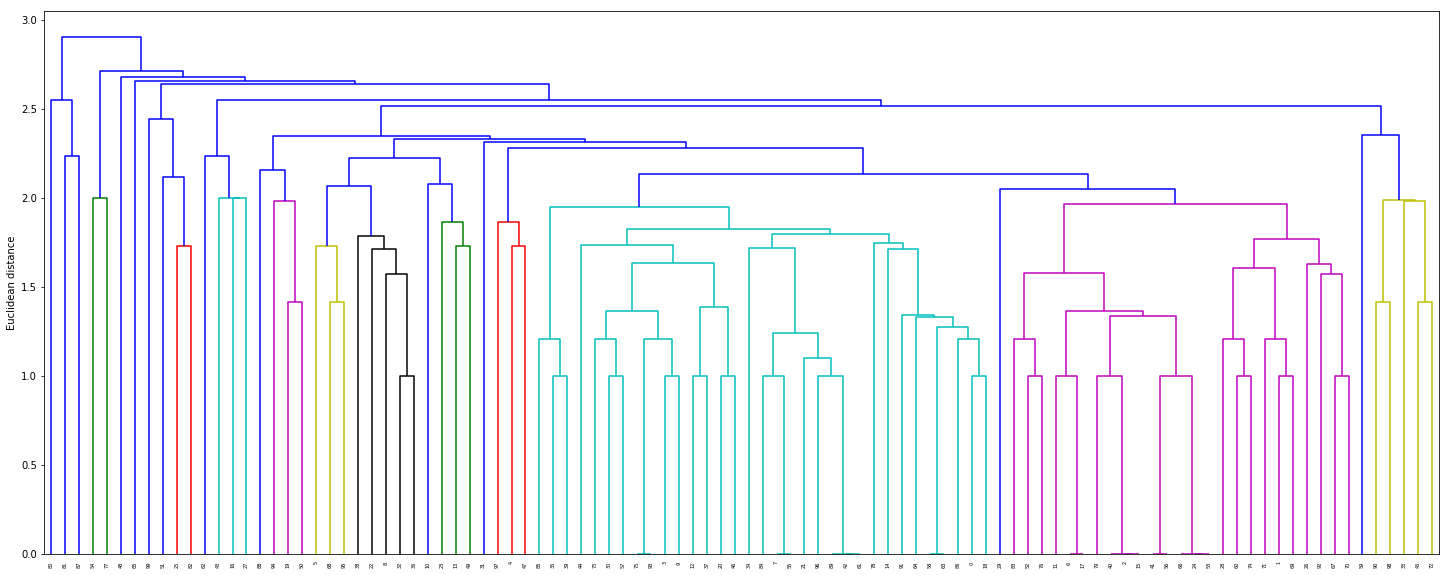

In [51]:
X = matrix[matrix.columns[2:]]
df1 = pd.DataFrame(X)
df1

plt.figure(figsize=(25, 10))   
row_clusters = linkage(pdist(df1, metric='euclidean'), method='average') 
row_dendr = dendrogram(row_clusters)

plt.ylabel('Euclidean distance')
plt.show()

In [52]:
part = fcluster(row_clusters, 10, 'maxclust')
part

array([ 7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  6,
        7,  7,  7,  7,  7,  7,  7,  7,  4,  7,  6,  7,  7,  7,  7,  7,  8,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  6,  7,  8,  7,  7, 10,  7,  7,
        4,  7,  7,  3,  7,  7,  7,  7,  8,  7,  7,  6,  7,  7,  9,  7,  7,
        7,  7,  7,  7,  8,  7,  7,  7,  7,  3,  7,  7,  2,  1,  4,  7,  7,
        7,  7,  1,  7,  7,  8,  7,  7,  7,  7,  7,  7,  7,  8,  5],
      dtype=int32)

# Zad.

Możemy zwizualizować wynik na płaszczyźnie 

* t-SNE
* PCA

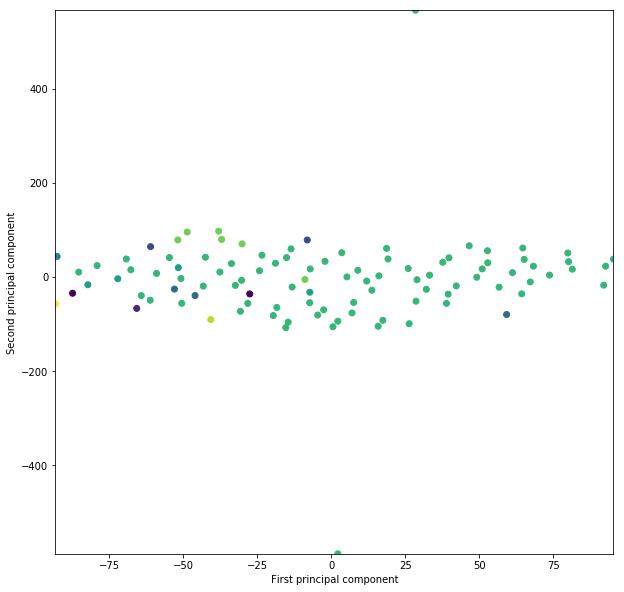

In [53]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
# use fit_transform instead of fit, as TSNE has no transform method
X_tsne = tsne.fit_transform(X)

from matplotlib import colors as mcolors
#colors = list(mcolors.CSS4_COLORS)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]

plt.figure(figsize=(10, 10))
plt.xlim(X_tsne[:, 0].min(), X_tsne[:, 0].max())
plt.ylim(X_tsne[:, 1].min(), X_tsne[:, 1].max())
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c = part)
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.show()

# Zad. 

Wypiszmy liczności klastrów na poziomach od 2 do 10 licząc od góry

In [56]:
#wypiszmy liczności klastrów z hierarchii
for k in range(2,10):
    matrix['cluster_' + str(k)] = fcluster(Z, k, criterion='maxclust')
    s = ""
    for i in range(1,k+1):
        s = s + str(len(np.where(matrix['cluster_' + str(k)] == i)[0])) + ", "
    print(str(k) + ": " + s)

2: 3, 97, 
3: 3, 2, 95, 
4: 3, 2, 94, 1, 
5: 3, 2, 93, 1, 1, 
6: 3, 2, 4, 89, 1, 1, 
7: 3, 2, 4, 4, 85, 1, 1, 
8: 2, 1, 2, 4, 4, 85, 1, 1, 
9: 2, 1, 2, 4, 4, 79, 6, 1, 1, 


# Zad:

Prosze wybrać sobie klienta np. Allen. Zobaczmy co preferują (a co nie) ludzie podobni do Allen'a - jakie wina, w jakich ilościach i z jakimi rabatami. Patrzymy na górne poziomy hierarchii.

In [57]:
#zobaczmy co lubi kupować klaster w którym jest klient Adams
name = 'Adams'
#analizujemy wszystkie podziały od 2 do 9 klastrów
for k in range(2,10):
    #wybieramy klaster w którym jest Adams - to jest tablica
    cluster = matrix.loc[matrix['customer_name'] == name]['cluster_' + str(k)]
    #dodajemy sobie kolumnę mówiąca czy to jest ten sam klaster co Adams - będę po niej grupował
    df['is_' + name + '_cluster'] = matrix['cluster_' + str(k)] == cluster[0]
    print("clusters " + str(k))
    #grupuję pole 'variental' po klastrach Adams'a
    print(df.groupby("is_" + name + "_cluster").varietal.value_counts())
    print("--------------------------------")

clusters 2
is_Adams_cluster  varietal          
False             Espumante              3
True              Prosecco              31
                  Espumante             23
                  Champagne             12
                  Malbec                10
                  Pinot Noir            10
                  Chardonnay             7
                  Cabernet Sauvignon     4
Name: varietal, dtype: int64
--------------------------------
clusters 3
is_Adams_cluster  varietal          
False             Espumante              4
                  Prosecco               1
True              Prosecco              30
                  Espumante             22
                  Champagne             12
                  Malbec                10
                  Pinot Noir            10
                  Chardonnay             7
                  Cabernet Sauvignon     4
Name: varietal, dtype: int64
--------------------------------
clusters 4
is_Adams_cluster  varietal          
F

# Zad.

Jaki typ klijentów reprezentuje każdy klaster?

Jak jest średnia ilości i rabatu?

In [58]:
for k in range(2,10):
    #wybieramy klaster w którym jest Adams - to jest tablica
    cluster = matrix.loc[matrix['customer_name'] == name]['cluster_' + str(k)]
    #dodajemy sobie kolumnę mówiąca czy to jest ten sam klaster co Adams - będę po niej grupował
    df['is_' + name + '_cluster'] = matrix['cluster_' + str(k)] == cluster[0]
    print("clusters " + str(k))
    #grupuję pole 'variental' po klastrach Adams'a
    print(df.groupby("is_" + name + "_cluster")[['min_qty', 'discount']].mean())
    print("--------------------------------")

clusters 2
                    min_qty   discount
is_Adams_cluster                      
False              6.000000  45.000000
True              69.030928  47.731959
--------------------------------
clusters 3
                    min_qty   discount
is_Adams_cluster                      
False              6.000000  44.000000
True              70.357895  47.842105
--------------------------------
clusters 4
                    min_qty  discount
is_Adams_cluster                     
False             29.000000  51.00000
True              69.574468  47.43617
--------------------------------
clusters 5
                    min_qty   discount
is_Adams_cluster                      
False             25.714286  49.428571
True              70.258065  47.516129
--------------------------------
clusters 6
                    min_qty   discount
is_Adams_cluster                      
False             56.181818  51.454545
True              68.494382  47.179775
--------------------------------
clus

Jego grupa kupuje w małych ilościach z rabatami większymi niż średnie (ale nieznacznie)